In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
%matplotlib inline

results= pd.DataFrame(columns = ['LC Name', 'Temperature', 'Switching Voltage','Rise Time','Decay Time','Total Response Time'])

In [30]:
#Loading the data
path="/home/avinash/Liquid_Crystal_Analysis/data/Batch1" #Enter Loaction WHere CSV data is kept

#temp= str(input("Enter Temperature: ")) #If you have a fixed value of temp, then comment this line and uncomment the next line after giving value
temp =str(30)
voltage=str(input("Enter Voltage: "))
final_path=path+"/"+temp+"_"+voltage+"_2.csv"
name_of_LC="Pure LC"# Change this to show type of LC

df=pd.read_csv(final_path,skiprows=1)
#df1=pd.read_csv("/home/avinash/Liquid_Crystal_Analysis/data/Batch1/30_8_1.csv",skiprows=1)
#Normalizing the Volt to represent transmittance
df.Volt=(df.Volt-df.Volt.min())/(df.Volt.max()-df.Volt.min())
#df1.Volt=(df1.Volt-df1.Volt.min())/(df1.Volt.max()-df1.Volt.min())

Rise Time =  0.0005875000000002512 seconds
Decay Time =  0.006424999999994999 seconds
Response Time =  0.00701249999999525 seconds


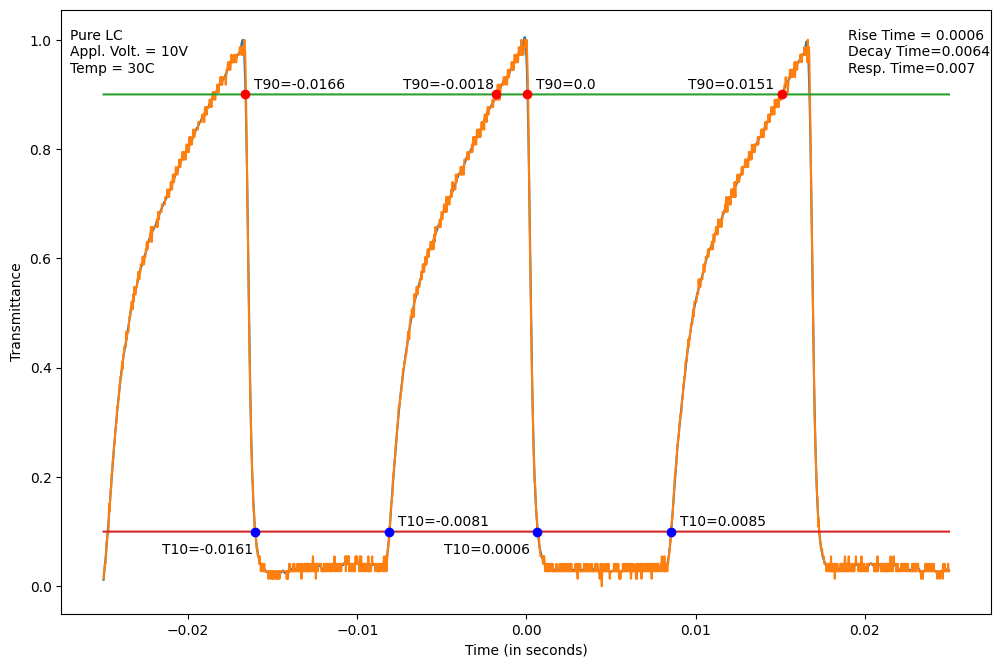

In [31]:
plt.figure(figsize=(12, 8), dpi=100, linewidth=0.1)
plt.xlabel("Time (in seconds)")
plt.ylabel("Transmittance")

#Have set the window size as a constant = 25. If the number of intersections on
#the 0.9 line or 0.1 line are more than 6, then icncrease window size

smooth=savgol_filter(df.Volt,25,2) #Creating a smoothened Curve us SavGol filter with window size 25 

plt.plot(df.second,smooth) #Printing the smooth curve
plt.plot(df.second,df.Volt)#Printing the actual curve

plt.plot(df.second,0.9*np.ones(df.second.shape)) #Printing horizontal line at 0.9
plt.plot(df.second,0.1*np.ones(df.second.shape)) #Printing horizontal line at 0.1

#Finding position where the curve closses the 0.9 transmittance
idx = np.argwhere(np.diff(np.sign(smooth - 0.9))).flatten()
if(len(idx)!=6):
    print("Error. Number of points greater than 6. Increase window size and retry")
    exit(1)
idx=idx[1:5] #Eliminating First and last points
plt.plot(df.second[idx], 0.9*np.ones(idx.size), 'ro') #Plotting Points of intersection
#print(len(idx))
idx_top=idx
for i in range(len(idx)):
    plt.annotate("T90="+str(round(df.second[idx[i]],4)),(df.second[idx[i]], 0.9),xytext =(df.second[idx[i]]+0.0005-max(0,0.006*pow(-1,i+1)), 0.91))


#Finding position where the curve closses the 0.1 transmittance
idx = np.argwhere(np.diff(np.sign(smooth - 0.1))).flatten()
if(len(idx)!=6):
    print("Error. Number of points greater than 6. Increase window size and retry")
    exit(1)
idx=idx[1:5] #Eliminating First and last points
plt.plot(df.second[idx], 0.1*np.ones(idx.size), 'bo') #Plotting Points of intersection
#print(len(idx))
idx_bot=idx
for i in range(len(idx)):
    plt.annotate("T10="+str(round(df.second[idx[i]],4)),(df.second[idx[i]], 0.1),xytext =(df.second[idx[i]]+0.0005-max(0,0.006*pow(-1,i)), 0.11-max(0,0.05*pow(-1,i))))

#Calculating RiseTime and DecayTime (average of 2 sets)
rise_time=((df.second[idx_bot[0]]-df.second[idx_top[0]])+(df.second[idx_bot[2]]-df.second[idx_top[2]]))/2
decay_time=((df.second[idx_top[1]]-df.second[idx_bot[1]])+(df.second[idx_top[3]]-df.second[idx_bot[3]]))/2
response_time=rise_time+decay_time
#Printing the times
print("Rise Time = ",rise_time,"seconds")
print("Decay Time = ",decay_time,"seconds")
print("Response Time = ",response_time,"seconds")
plt.annotate("Rise Time = "+str(round(rise_time,4)),xy=(0.019,1))
plt.annotate("Decay Time="+str(round(decay_time,4)),xy=(0.019,0.97))
plt.annotate("Resp. Time="+str(round(response_time,4)),xy=(0.019,0.94))
plt.annotate(name_of_LC,xy=(-0.027,1))
plt.annotate("Appl. Volt. = "+voltage+"V",xy=(-0.027,0.97))
plt.annotate("Temp = "+temp+"C",xy=(-0.027,0.94))

plt.savefig(path+"/"+temp+"_"+voltage+".jpg", dpi=300,bbox_inches='tight')
plt.show()


In [32]:
results=results.append({'LC Name':name_of_LC, 'Temperature':temp, 'Switching Voltage':voltage,'Rise Time':rise_time,'Decay Time':decay_time,'Total Response Time': response_time},ignore_index=True)
results.tail()

,LC Name,Temperature,Switching Voltage,Rise Time,Decay Time,Total Response Time
3,Pure LC,30,7,0.000950,0.006425,0.007375
4,Pure LC,30,8,0.000775,0.006612,0.007387
5,Pure LC,30,9,0.000600,0.006400,0.007000
6,Pure LC,30,9,0.000600,0.006400,0.007000
7,Pure LC,30,10,0.000588,0.006425,0.007012


In [33]:
results.to_csv(path+"/"+"Results.csv")

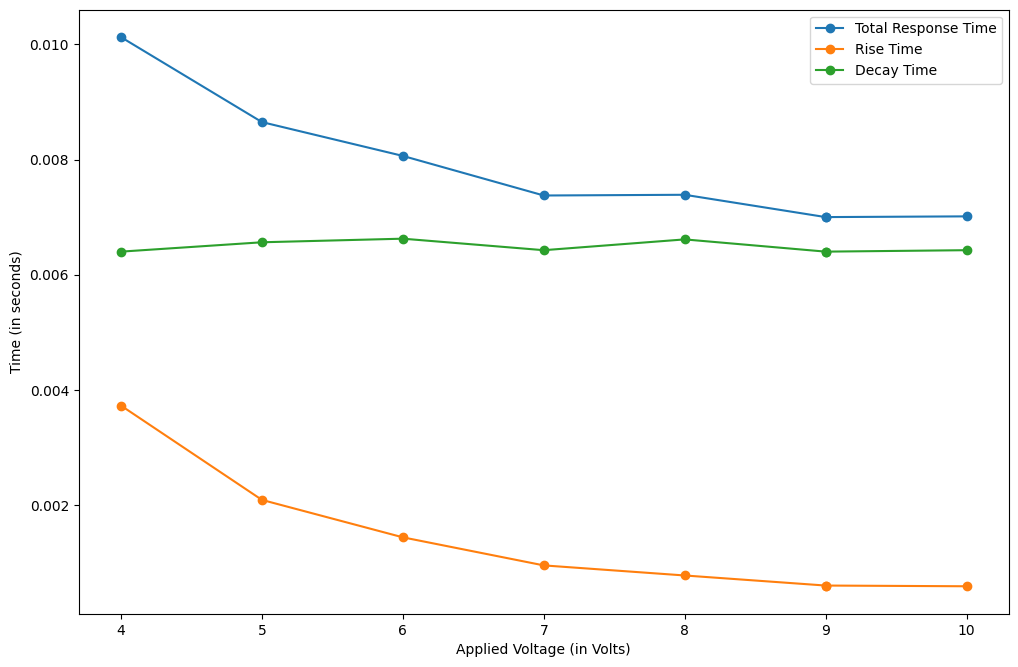

In [40]:
plt.figure(1,figsize=(12, 8), dpi=100, linewidth=0.1)
plt.ylabel("Time (in seconds)")
plt.xlabel("Applied Voltage (in Volts)")
plt.plot(results['Switching Voltage'],results['Total Response Time'],'-o')
plt.plot(results['Switching Voltage'],results['Rise Time'],'-o')
plt.plot(results['Switching Voltage'],results['Decay Time'],'-o')
plt.legend(['Total Response Time','Rise Time','Decay Time'])
plt.savefig(path+"/"+name_of_LC+"_"+temp+".jpg", dpi=300,bbox_inches='tight')
plt.show()
